In [14]:
pip install transformers

Note: you may need to restart the kernel to use updated packages.


In [69]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, BertModel
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import gensim.downloader as api
from sklearn.metrics import f1_score

In [49]:
df=pd.read_excel("data.xlsx")

In [50]:
df.isnull().sum()

V_OCC_DESC             5
V_EMPLOYER_NAME_x    432
V_BIOGRAPHY            0
LABEL                  0
dtype: int64

In [51]:
df.head()

,V_OCC_DESC,V_EMPLOYER_NAME_x,V_BIOGRAPHY,LABEL
0,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0
1,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0
2,ENGINEERING PROFESSIONALS (INCLUDING ELECTROTE...,SRI ESBINA (M) SDN BHD,[BIOGRAPHY] Military AttachÃ© to Netherlands (...,0
3,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] General Manager of Guizhou Provinc...,0
4,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] Member of the Board of Directors o...,0


In [52]:
df.shape

(15796, 4)

In [53]:
df= df[df['V_BIOGRAPHY'].str.startswith('[BIOGRAPHY]')] 


In [54]:
df.shape

(15306, 4)

In [55]:
df['WATCHLIST_BIOGRAPHY'] = df['V_BIOGRAPHY'].str.extract(r'\[BIOGRAPHY\](.*?)\[IDENTIFICATION\]')

In [56]:
df

,V_OCC_DESC,V_EMPLOYER_NAME_x,V_BIOGRAPHY,LABEL,WATCHLIST_BIOGRAPHY
0,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.
1,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.
2,ENGINEERING PROFESSIONALS (INCLUDING ELECTROTE...,SRI ESBINA (M) SDN BHD,[BIOGRAPHY] Military AttachÃ© to Netherlands (...,0,Military AttachÃ© to Netherlands (Jan 2020 - ).
3,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] General Manager of Guizhou Provinc...,0,General Manager of Guizhou Province High-tech...
4,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] Member of the Board of Directors o...,0,Member of the Board of Directors of Guangxi G...
...,...,...,...,...,...
15791,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ASCENSION ENGINEERING SERVICES PTE LTD,[BIOGRAPHY] Director of Ascension Engineering ...,1,Director of Ascension Engineering Services Pt...
15792,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ARAB MONETARY FUND ABU DHABI,[BIOGRAPHY] Director of Cooperation at the Min...,1,Director of Cooperation at the Ministry of Fi...
15793,MANAGING DIRECTORS AND CHIEF EXECUTIVES,UNITED COMMERCIAL BANK LIMITED,[BIOGRAPHY] Member of the Board of Directors o...,1,Member of the Board of Directors of Aramit Gr...
15794,MANAGING DIRECTORS AND CHIEF EXECUTIVES,EUROPEAN INVESTMENT BANK,[BIOGRAPHY] Counsellor (Financial Affairs) in ...,1,Counsellor (Financial Affairs) in London (rep...


In [57]:
df.isnull().sum()

V_OCC_DESC               5
V_EMPLOYER_NAME_x      425
V_BIOGRAPHY              0
LABEL                    0
WATCHLIST_BIOGRAPHY      0
dtype: int64

In [58]:
df=df.dropna()

In [59]:
df.isnull().sum()

V_OCC_DESC             0
V_EMPLOYER_NAME_x      0
V_BIOGRAPHY            0
LABEL                  0
WATCHLIST_BIOGRAPHY    0
dtype: int64

In [60]:
df['CUSTOMER_BIOGRAPHY']='person works in'+" "+df['V_EMPLOYER_NAME_x']+" "+'as'+" "+df['V_OCC_DESC']

C:\Users\80009028\AppData\Local\Temp\1\ipykernel_760472\1646563677.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CUSTOMER_BIOGRAPHY']='person works in'+" "+df['V_EMPLOYER_NAME_x']+" "+'as'+" "+df['V_OCC_DESC']


In [61]:
df

,V_OCC_DESC,V_EMPLOYER_NAME_x,V_BIOGRAPHY,LABEL,WATCHLIST_BIOGRAPHY,CUSTOMER_BIOGRAPHY
0,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.,person works in BEYONICS PRECISION (M) SDN BHD...
1,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.,person works in BEYONICS PRECISION (M) SDN BHD...
2,ENGINEERING PROFESSIONALS (INCLUDING ELECTROTE...,SRI ESBINA (M) SDN BHD,[BIOGRAPHY] Military AttachÃ© to Netherlands (...,0,Military AttachÃ© to Netherlands (Jan 2020 - ).,person works in SRI ESBINA (M) SDN BHD as ENGI...
3,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] General Manager of Guizhou Provinc...,0,General Manager of Guizhou Province High-tech...,person works in GENTING MALAYSIA BERHAD as MAN...
4,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] Member of the Board of Directors o...,0,Member of the Board of Directors of Guangxi G...,person works in GENTING MALAYSIA BERHAD as MAN...
...,...,...,...,...,...,...
15791,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ASCENSION ENGINEERING SERVICES PTE LTD,[BIOGRAPHY] Director of Ascension Engineering ...,1,Director of Ascension Engineering Services Pt...,person works in ASCENSION ENGINEERING SERVICES...
15792,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ARAB MONETARY FUND ABU DHABI,[BIOGRAPHY] Director of Cooperation at the Min...,1,Director of Cooperation at the Ministry of Fi...,person works in ARAB MONETARY FUND ABU DHABI a...
15793,MANAGING DIRECTORS AND CHIEF EXECUTIVES,UNITED COMMERCIAL BANK LIMITED,[BIOGRAPHY] Member of the Board of Directors o...,1,Member of the Board of Directors of Aramit Gr...,person works in UNITED COMMERCIAL BANK LIMITED...
15794,MANAGING DIRECTORS AND CHIEF EXECUTIVES,EUROPEAN INVESTMENT BANK,[BIOGRAPHY] Counsellor (Financial Affairs) in ...,1,Counsellor (Financial Affairs) in London (rep...,person works in EUROPEAN INVESTMENT BANK as MA...


In [62]:
# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')


In [63]:
# Define a function to compute BERT embeddings for text
def get_bert_embeddings(text):
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    with torch.no_grad():
        outputs = model(**inputs)
    embeddings = torch.mean(outputs.last_hidden_state, dim=1)  # Mean pooling of embeddings
    return embeddings

In [20]:
#customer_embeddings = get_bert_embeddings(df['CUSTOMER_BIOGRAPHY'].tolist())
#watchlist_embeddings = get_bert_embeddings(df['WATCHLIST_BIOGRAPHY'].tolist())

In [23]:
#similarity_scores = cosine_similarity(row[customer_embeddings], row[watchlist_embeddings])

NameError: name 'row' is not defined

In [64]:
similarity_scores = []
for index, row in df.iterrows():
    customer_text = row['CUSTOMER_BIOGRAPHY']
    watchlist_text = row['WATCHLIST_BIOGRAPHY']
    
    # Compute BERT embeddings for the text
    customer_embedding = get_bert_embeddings(customer_text)
    watchlist_embedding = get_bert_embeddings(watchlist_text)
    
    # Compute cosine similarity between embeddings
    similarity_score = cosine_similarity(customer_embedding, watchlist_embedding)[0][0]
    similarity_scores.append(similarity_score)

# Add similarity scores to DataFrame
df['Similarity Score'] = similarity_scores

C:\Users\80009028\AppData\Local\Temp\1\ipykernel_760472\3375272457.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Similarity Score'] = similarity_scores


In [65]:
df

,V_OCC_DESC,V_EMPLOYER_NAME_x,V_BIOGRAPHY,LABEL,WATCHLIST_BIOGRAPHY,CUSTOMER_BIOGRAPHY,Similarity Score
0,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.,person works in BEYONICS PRECISION (M) SDN BHD...,0.444569
1,MANUFACTURING LABOURERS,BEYONICS PRECISION (M) SDN BHD,[BIOGRAPHY] To be determined. [IDENTIFICATION]...,0,To be determined.,person works in BEYONICS PRECISION (M) SDN BHD...,0.444569
2,ENGINEERING PROFESSIONALS (INCLUDING ELECTROTE...,SRI ESBINA (M) SDN BHD,[BIOGRAPHY] Military AttachÃ© to Netherlands (...,0,Military AttachÃ© to Netherlands (Jan 2020 - ).,person works in SRI ESBINA (M) SDN BHD as ENGI...,0.609141
3,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] General Manager of Guizhou Provinc...,0,General Manager of Guizhou Province High-tech...,person works in GENTING MALAYSIA BERHAD as MAN...,0.621188
4,MANUFACTURING LABOURERS,GENTING MALAYSIA BERHAD,[BIOGRAPHY] Member of the Board of Directors o...,0,Member of the Board of Directors of Guangxi G...,person works in GENTING MALAYSIA BERHAD as MAN...,0.625863
...,...,...,...,...,...,...,...
15791,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ASCENSION ENGINEERING SERVICES PTE LTD,[BIOGRAPHY] Director of Ascension Engineering ...,1,Director of Ascension Engineering Services Pt...,person works in ASCENSION ENGINEERING SERVICES...,0.842897
15792,MANAGING DIRECTORS AND CHIEF EXECUTIVES,ARAB MONETARY FUND ABU DHABI,[BIOGRAPHY] Director of Cooperation at the Min...,1,Director of Cooperation at the Ministry of Fi...,person works in ARAB MONETARY FUND ABU DHABI a...,0.732916
15793,MANAGING DIRECTORS AND CHIEF EXECUTIVES,UNITED COMMERCIAL BANK LIMITED,[BIOGRAPHY] Member of the Board of Directors o...,1,Member of the Board of Directors of Aramit Gr...,person works in UNITED COMMERCIAL BANK LIMITED...,0.767936
15794,MANAGING DIRECTORS AND CHIEF EXECUTIVES,EUROPEAN INVESTMENT BANK,[BIOGRAPHY] Counsellor (Financial Affairs) in ...,1,Counsellor (Financial Affairs) in London (rep...,person works in EUROPEAN INVESTMENT BANK as MA...,0.723316


In [66]:
similarity_scores=df['Similarity Score']

In [67]:
labels=df['LABEL']

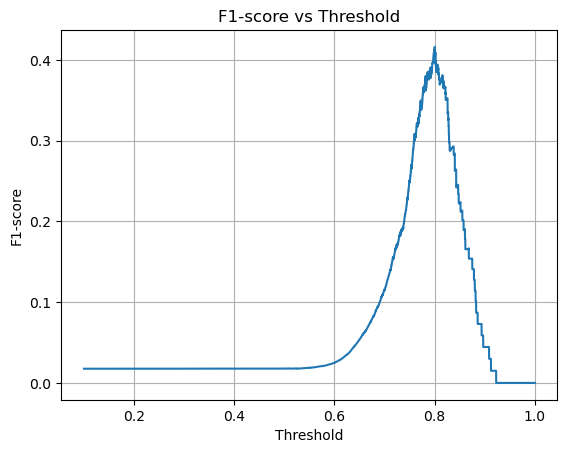

Best Threshold: 0.7998749937496874
Best F1-Score: 0.41592920353982304


In [70]:
# Define thresholds
thresholds = np.linspace(0.1, 1.0, num=20000)

# Initialize variables to store best F1-score and its threshold
best_f1_score = 0
best_threshold = None

# Initialize lists to store F1-scores and thresholds for plotting
f1_scores = []
threshold_values = []

# Iterate over different threshold values
for threshold in thresholds:
    # Convert similarity scores to predicted labels using the threshold
    predicted_labels = [1 if score >= threshold else 0 for score in similarity_scores]
    
    # Compute F1-score
    f1 = f1_score(labels, predicted_labels)
    
    # Store F1-score and threshold
    f1_scores.append(f1)
    threshold_values.append(threshold)
    
    # Check if the current F1-score is the best so far
    if f1 > best_f1_score:
        best_f1_score = f1
        best_threshold = threshold

# Plot F1-score vs Threshold
plt.plot(threshold_values, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs Threshold')
plt.grid(True)
plt.show()

print("Best Threshold:", best_threshold)
print("Best F1-Score:", best_f1_score)